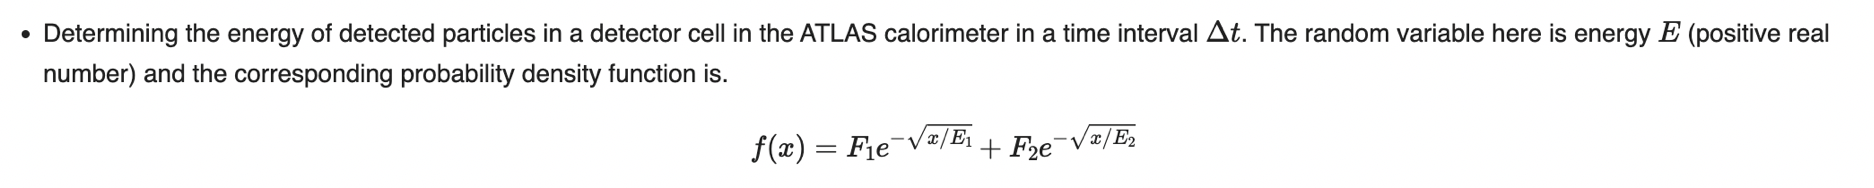

In [62]:
# Importing pakages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sympy as smp
plt.style.use(['science','notebook'])

In [63]:
# Let's define the Probability Distribution Function (PDF)
F1,F2,E1,E2,x,y = smp.symbols('F1 F2 E1 E2 x y',real=True,positive=True)
f_s = F1*smp.exp(-(x/E1)**smp.Rational(1/2)) + F2*smp.exp(-(x/E2)**smp.Rational(1/2))
f_s # this is the symbolic representation of the given PDF
# it is Perfect. here y is just a symbolic replacement for x

F1*exp(-sqrt(x)/sqrt(E1)) + F2*exp(-sqrt(x)/sqrt(E2))

In [64]:
# now, lets get its CDM
F_s = smp.integrate(f_s,(x,0,y)) # integrating f(x) wrt x from (0,y)
F_s

2*E1*F1 + 2*E2*F2 + F1*(-2*sqrt(E1)*sqrt(y)*exp(-sqrt(y)/sqrt(E1)) - 2*E1*exp(-sqrt(y)/sqrt(E1))) + F2*(-2*sqrt(E2)*sqrt(y)*exp(-sqrt(y)/sqrt(E2)) - 2*E2*exp(-sqrt(y)/sqrt(E2)))

In [65]:
f_n = smp.lambdify((F1,F2,E1,E2,x), f_s) # before integration that is why we are using x
F_n = smp.lambdify((F1,F2,E1,E2,y), F_s) # after integration so we are using y

In [66]:
f_n

<function _lambdifygenerated(F1, F2, E1, E2, x)>

In [67]:
F_n

<function _lambdifygenerated(F1, F2, E1, E2, y)>

In [68]:
# now we will Get parameters and give actual numerical values
E1 = E2 = 0.2
F1 = 1.3
F2 = 1.4
x = np.linspace(0,7,10000)
f = f_n(F1,F2,E1,E2,x)
F = F_n(F1,F2,E1,E2,x)

In [69]:
f

array([2.7       , 2.5448915 , 2.48328328, ..., 0.00728283, 0.00728067,
       0.00727852])

(array([8.516e+03, 7.530e+02, 3.210e+02, 1.720e+02, 1.010e+02, 6.200e+01,
        3.800e+01, 2.200e+01, 1.100e+01, 4.000e+00]),
 array([0.00727852, 0.27655067, 0.54582281, 0.81509496, 1.08436711,
        1.35363926, 1.62291141, 1.89218356, 2.1614557 , 2.43072785,
        2.7       ]),
 <BarContainer object of 10 artists>)

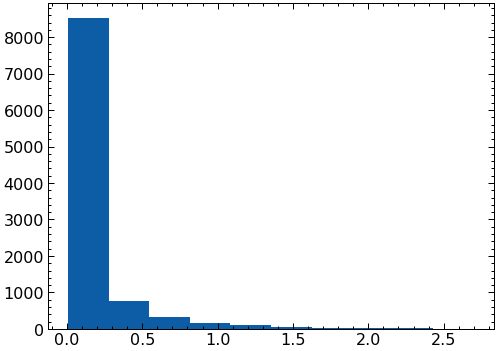

In [70]:
plt.hist(f)

(array([  79.,  111.,  145.,  190.,  252.,  345.,  495.,  783., 1498.,
        6102.]),
 array([1.11022302e-16, 1.05986448e-01, 2.11972895e-01, 3.17959343e-01,
        4.23945790e-01, 5.29932238e-01, 6.35918685e-01, 7.41905133e-01,
        8.47891580e-01, 9.53878028e-01, 1.05986448e+00]),
 <BarContainer object of 10 artists>)

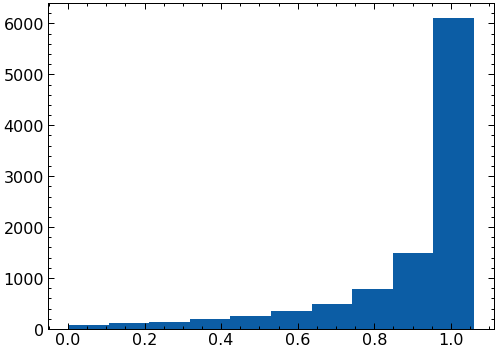

In [71]:
plt.hist(F)

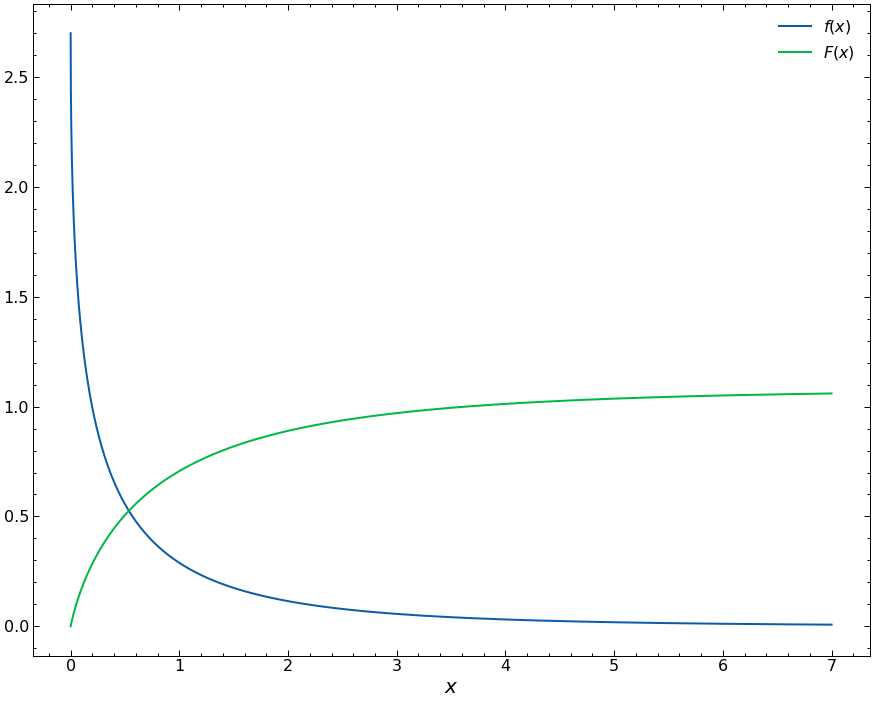

In [72]:
plt.figure(figsize=(15,12))
plt.plot(x, f, label=r'$f(x)$')
plt.plot(x,F, label=r'$F(x)$')
plt.legend()
plt.xlabel('$x$', fontsize=20)
plt.legend()
plt.show()

In [73]:
# now, we will try to get F_inv by using some special trick 
U = np.random.rand(10000)
F_inv_U = x[np.searchsorted(F[:-1], U)]
# np.searchsorted - function is used to find the indices into a sorted array arr such that,
# if elements are inserted before the indices, the order of arr would be still preserved. 
#Here, binary search is used to find the required insertion indices.
# it will find points corresponding to the given U for F(U)

(array([4277., 1924., 1171.,  792.,  568.,  386.,  305.,  232.,  203.,
         142.]),
 array([7.00070007e-04, 3.64176418e-01, 7.27652765e-01, 1.09112911e+00,
        1.45460546e+00, 1.81808181e+00, 2.18155816e+00, 2.54503450e+00,
        2.90851085e+00, 3.27198720e+00, 3.63546355e+00]),
 <BarContainer object of 10 artists>)

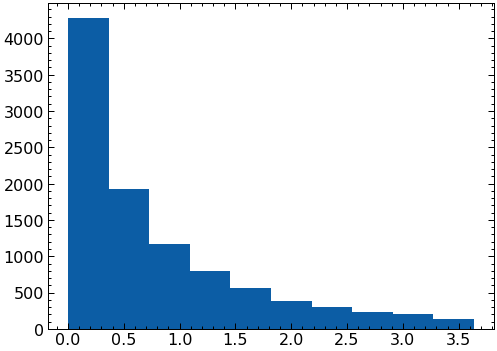

In [77]:
plt.hist(F_inv_U)

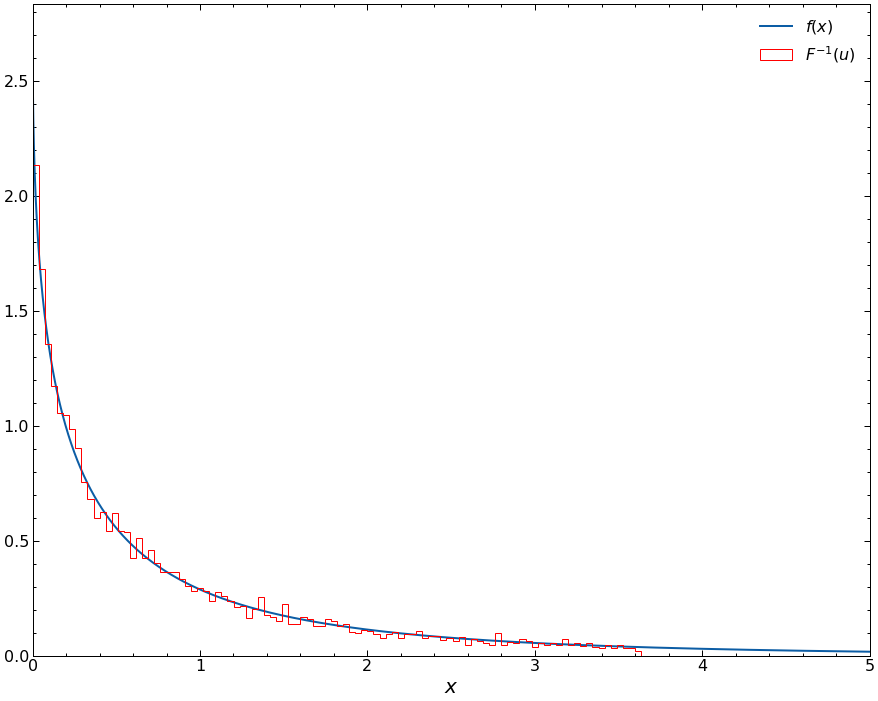

In [75]:
plt.figure(figsize=(15,12))
plt.plot(x, f, label=r'$f(x)$')
plt.hist(F_inv_U, histtype='step', color='red', density='norm', bins=100, label='$F^{-1}(u)$')
plt.legend()
plt.xlabel('$x$', fontsize=20)
plt.legend()
plt.xlim(0,5)
plt.show()
# Perfect.